In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

Load the processed CSV file

In [30]:
input_file = './data/processed_data.csv'

In [31]:
df = pd.read_csv(input_file)

Remove rows with NaN values

In [32]:
df.dropna(inplace=True)

Define the threshold for removing extreme Y values

In [33]:
threshold = 3.5  # Adjust this value based on your dataset and requirements

Calculate the mean and standard deviation of Y

In [34]:
mean_Y = np.mean(df['Temperature'])
std_Y = np.std(df['Temperature'])

Define the range of acceptable Y values

In [35]:
lower_bound = mean_Y - threshold * std_Y
upper_bound = mean_Y + threshold * std_Y

Filter out rows with Y values outside the acceptable range

In [36]:
df = df[(df['Temperature'] >= lower_bound) & (df['Temperature'] <= upper_bound)]

Extract the columns

In [37]:
X = df[['Month', 'Date', 'Time', 'Previous Day Average', 'Two Days Before Average', 'Three Days Before Average', 'Last 7 Days Average', 'Previous Day Wind Speed', 'Previous Day Rainfall']].values
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')
Y = df['Temperature'].values

Normalize X values

In [38]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Split the data into training and testing sets

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Define the model

In [40]:
model = GradientBoostingRegressor()

Train the model

In [41]:
model.fit(X_train, Y_train)

GradientBoostingRegressor()

Make predictions

In [42]:
predictions = model.predict(X_test)

Evaluate the model

In [43]:
mse = mean_squared_error(Y_test, predictions)

In [44]:
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 3.5270849395404533


Print some example predictions

In [45]:
for i in range(10):
    print("Predicted:", predictions[i])
    print("Actual:", Y_test[i])
    print()

Predicted: 18.97350815866546
Actual: 20.4

Predicted: 16.943234596751942
Actual: 17.5

Predicted: 21.664761401234106
Actual: 22.7

Predicted: 15.773850992429654
Actual: 15.0

Predicted: 11.501337551241809
Actual: 14.6

Predicted: 12.451346669869775
Actual: 10.7

Predicted: 20.561754635733728
Actual: 20.8

Predicted: 17.296382729014017
Actual: 18.6

Predicted: 22.23610434801829
Actual: 22.5

Predicted: 22.41278167956887
Actual: 22.7



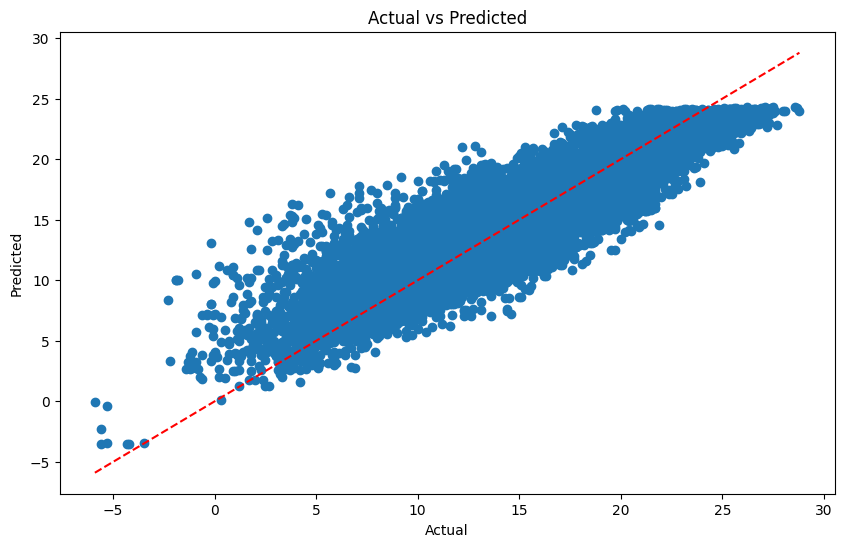

In [46]:
# Plot actual vs predicted results
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

Save the trained model

In [47]:
import joblib
joblib.dump(model, "./model.pkl")

['./model.pkl']